In [6]:
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv('spam.csv', encoding = "ISO-8859-1")

In [8]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
715,ham,When i have stuff to sell i.ll tell you,NaN,NaN,NaN
3512,ham,Staff of placement training in Amrita college.,NaN,NaN,NaN
3067,ham,Boy you best get yo ass out here quick,NaN,NaN,NaN
605,ham,TaKe CaRE n gET WeLL sOOn,NaN,NaN,NaN
2877,spam,Hey Boys. Want hot XXX pics sent direct 2 ur p...,NaN,NaN,NaN


In [9]:
df.shape

(5572, 5)

# 1. Data cleaning

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [11]:
# drop last 3 cols

df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [12]:
df.sample(5)

,v1,v2
4035,ham,How are you holding up?
518,ham,That way transport is less problematic than on...
2038,ham,Hey are we going for the lo lesson or gym?
3990,ham,I am on the way to ur home
5247,ham,Gud ni8 dear..slp well..take care..swt dreams....


In [13]:
# renaming the columns
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)

In [14]:
df.sample(5)

,target,text
3227,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
3968,ham,Thanks for your message. I really appreciate y...
2131,ham,S...from the training manual it show there is ...
4733,spam,Buy Space Invaders 4 a chance 2 win orig Arcad...
5539,ham,Just sleeping..and surfing


In [15]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [16]:
df['target'] = encoder.fit_transform(df['target'])

In [17]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
# missing values check
df.isnull().sum()

target    0
text      0
dtype: int64

In [19]:
df.duplicated().sum()

403

In [20]:
# remove duplicates
df = df.drop_duplicates(keep='first')

# 2.EDA

In [21]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

([<matplotlib.patches.Wedge at 0x7fe7298e1c30>,
 [Text(-1.0144997251399075, 0.42519443516002464, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001339, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

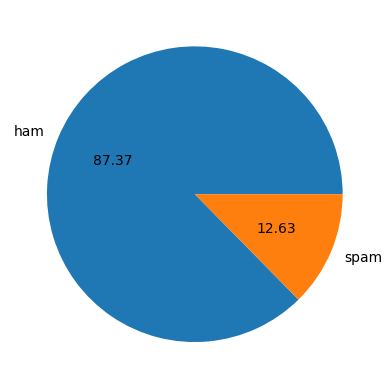

In [23]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'],autopct="%.2f")

In [24]:
# data is imbalanced

In [25]:
!pip install nltk

In [26]:
import nltk

In [27]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shashwatsaran/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
df['num_characters'] = df['text'].apply(len)

In [29]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [30]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [31]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [34]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [35]:
df.sample(5)

,target,text,num_characters,num_words,num_sentences
3267,0,Which is why i never wanted to tell you any of...,111,28,2
1913,0,You want to go?,16,5,1
225,0,Would really appreciate if you call me. Just n...,69,15,2
882,0,I love to give massages. I use lots of baby oi...,78,19,2
3635,0,\ME 2 BABE I FEEL THE SAME LETS JUST 4GET ABOU...,104,22,1


In [36]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [37]:
#ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [38]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [39]:
import seaborn as sns

<AxesSubplot: xlabel='num_characters', ylabel='Count'>

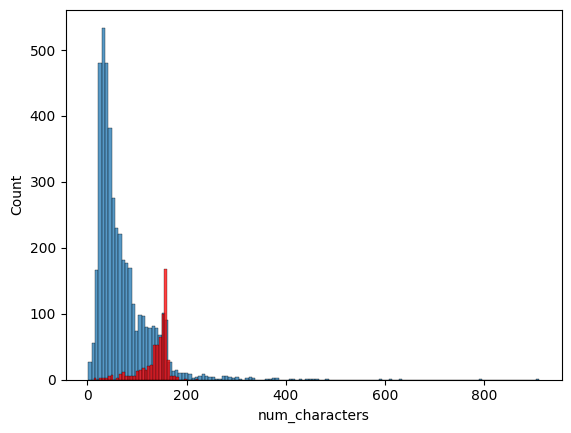

In [40]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

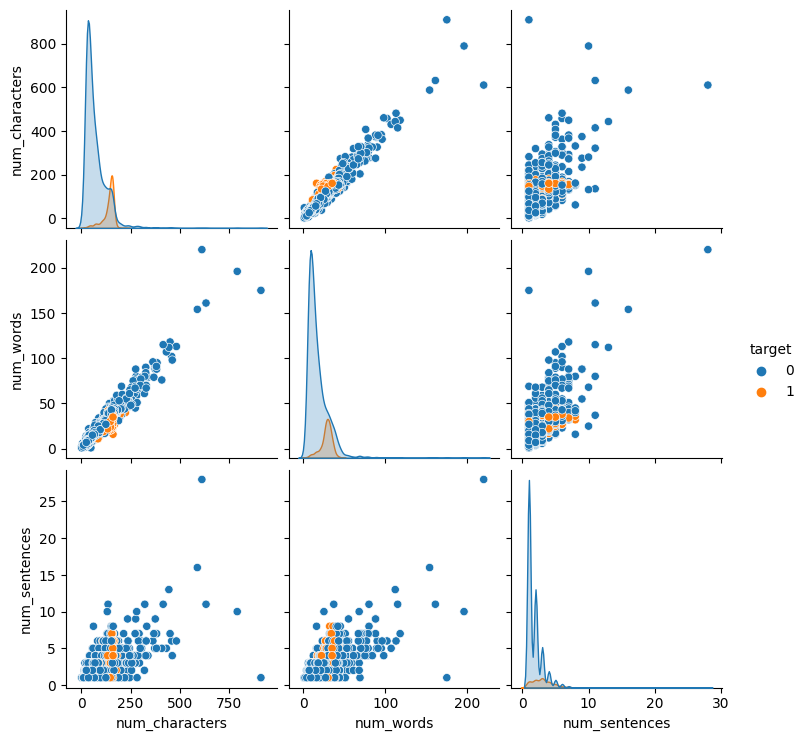

In [41]:
sns.pairplot(df, hue='target')

/var/folders/nh/k4zjxtbs3fx8txvlm807ghtr0000gn/T/ipykernel_54466/621126171.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<AxesSubplot: >

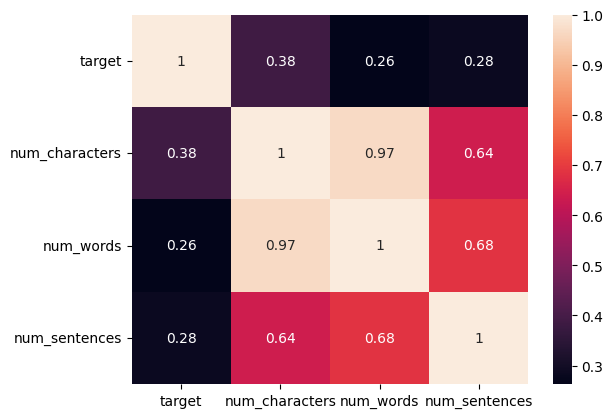

In [42]:
sns.heatmap(df.corr(), annot=True)

# Data Preprocessing
1. Lower case
2. Tokenization
3. Removing special chars
4. Removing stop words and puncruarion 
5. Stemming

In [48]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:];
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:];
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [49]:
transform_text('Hi How are You shashwat?')

'hi shashwat'

In [45]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [46]:
import string
string.punctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [47]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [50]:
transform_text('I loved the YT lectures on Machine learning. How about you?')

'love yt lectur machin learn'

In [51]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [52]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [53]:
df['transformed_text'] = df['text'].apply(transform_text)

In [54]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## Generating word cloud

In [55]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10,background_color='white') 
                

In [56]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

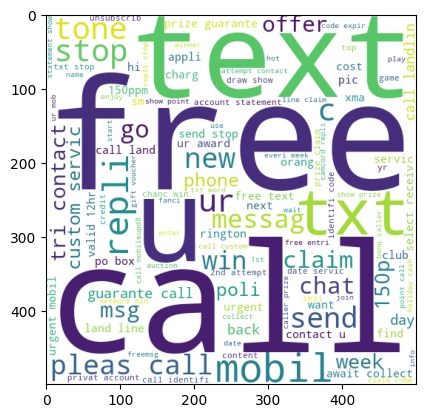

In [57]:
plt.figsize=(15,6)
plt.imshow(spam_wc)

In [58]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

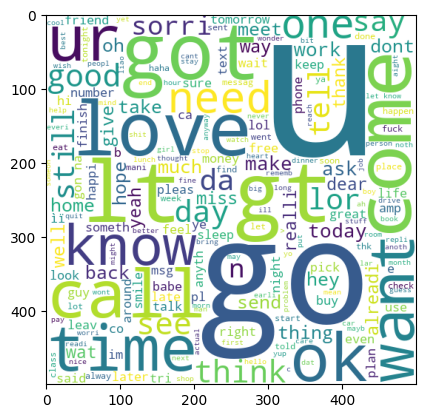

In [59]:
plt.imshow(ham_wc)

In [60]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [61]:
# top 30 words

spam_corpus = []
for message in df[df['target']==1]['transformed_text'].tolist():
    for word in message.split():
        spam_corpus.append(word)

In [62]:
len(spam_corpus)

9939

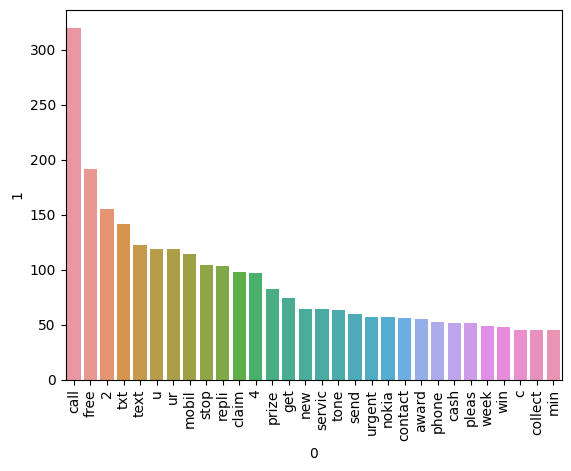

In [63]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [64]:
# top 30 words : ham

ham_corpus = []
for message in df[df['target']==0]['transformed_text'].tolist():
    for word in message.split():
        ham_corpus.append(word)

In [65]:
len(ham_corpus)

35394

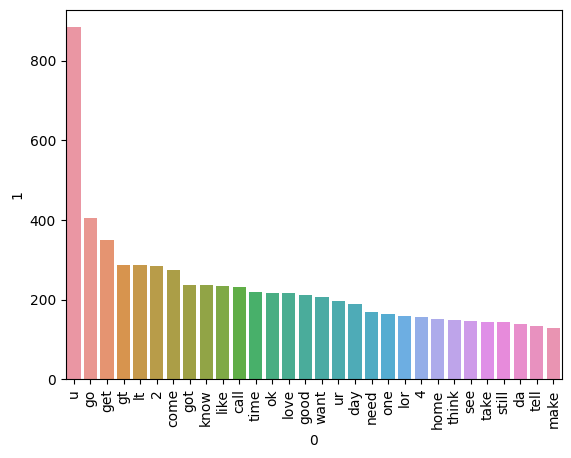

In [66]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## 4. Model building



In [151]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [68]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [69]:
X.shape

(5169, 6708)

In [153]:
y = df['target'].values

In [154]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [155]:
from sklearn.model_selection import train_test_split

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2)

In [157]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [158]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [159]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [160]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [161]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [152]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [150]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

## training on other model selectors

In [162]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [163]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [82]:
!pip install xgboost

In [164]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [165]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision


In [166]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [167]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9294003868471954
Precision -  0.8282828282828283
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9748549323017408
Precision -  0.9827586206896551
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9574468085106383
Precision -  0.8671875
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9477756286266924
Precision -  0.92
For  xgb
Accuracy -  0.971953578336557
Precision -  0.943089430894309


In [168]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [169]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.974855,0.982759
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.971954,0.943089
6,AdaBoost,0.960348,0.929204
9,GBDT,0.947776,0.920000
7,BgC,0.957447,0.867188


In [145]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")


In [146]:
performance_df1

,Algorithm,variable,value
0,RF,Accuracy,0.974855
1,KN,Accuracy,0.905222
2,ETC,Accuracy,0.974855
3,LR,Accuracy,0.967118
4,NB,Accuracy,0.978723
5,xgb,Accuracy,0.971954
6,AdaBoost,Accuracy,0.960348
7,SVC,Accuracy,0.966151
8,GBDT,Accuracy,0.947776
9,BgC,Accuracy,0.957447


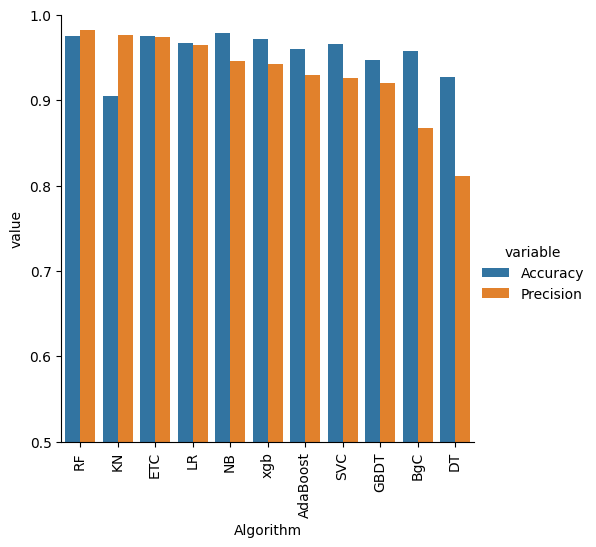

In [170]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [172]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [148]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)


In [96]:
new_df = performance_df.merge(temp_df,on='Algorithm')


In [97]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')


In [98]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)


In [175]:
new_df_scaled.merge(temp_df,on='Algorithm')


,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.907157,1.000000,0.907157,1.000000,0.907157,1.000000,0.905222,1.000000
1,RF,0.971954,1.000000,0.971954,1.000000,0.971954,1.000000,0.974855,0.982759
2,ETC,0.977756,0.991453,0.977756,0.991453,0.977756,0.991453,0.974855,0.974576
3,xgb,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.971954,0.943089
4,LR,0.970986,0.973684,0.970986,0.973684,0.970986,0.973684,0.958414,0.970297
5,AdaBoost,0.963250,0.946429,0.963250,0.946429,0.963250,0.946429,0.960348,0.929204
6,GBDT,0.943907,0.944444,0.943907,0.944444,0.943907,0.944444,0.947776,0.920000
7,DT,0.924565,0.916667,0.924565,0.916667,0.924565,0.916667,0.929400,0.828283
8,BgC,0.962282,0.915966,0.962282,0.915966,0.962282,0.915966,0.957447,0.867188
9,NB,0.964217,0.834437,0.964217,0.834437,0.964217,0.834437,0.970986,1.000000


In [122]:
performance_df.merge(temp_df, on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000
2,RF,0.974855,0.982759,0.974855,0.982759
3,SVC,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297
6,xgb,0.971954,0.943089,0.971954,0.943089
7,AdaBoost,0.960348,0.929204,0.960348,0.929204
8,GBDT,0.947776,0.920000,0.947776,0.920000
9,BgC,0.957447,0.867188,0.957447,0.867188
